In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


regions = {
    'CA' : 'Canada',
    'DE' : 'Denmark',
    'FR' : 'France',
    'GB' : 'Great Britian',
    'IN' : 'India',
    'JP' : 'Japan',
    'KR' : 'South Korea',
    'MX' : 'Mexico',
    'RU' : 'Russia',
    'US' : 'United States'
}

In [39]:
# read df:

df = pd.read_csv('dataset/USvideos.csv',keep_default_na=False)
df_GB = pd.read_csv('dataset/GBvideos.csv',keep_default_na=False)
df = df.append(df_GB, ignore_index = True)

# Split Tags:

def split_tags(tags_string):
    return re.split(r'(?:"\|")|(?:\|")', tags_string[:-1])

df['tags'] = df['tags'].apply(split_tags)

# Remove none from tags:

def none_list(inp_list):
    if len(inp_list) == 1 and inp_list[0] == '[none':
        return list()
    else:
        return inp_list

df['tags'] = df['tags'].apply(none_list)

8.0
8.628986414574594
1
23


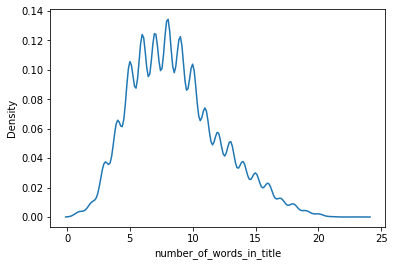

In [40]:
df['number_of_words_in_title'] = df['title'].apply(lambda x : len(x.split()))

print(df['number_of_words_in_title'].median())
print(df['number_of_words_in_title'].mean())
print(df['number_of_words_in_title'].min())
print(df['number_of_words_in_title'].max())

ax = sns.kdeplot(data=df, x="number_of_words_in_title")
plt.show()

In [41]:
def get_number_of_capital_words(sentence):
    words = sentence.split()
    count = 0
    for word in words:
        if word.isupper():
            count += 1
    return count

df['number_of_capital_words_in_title'] = df['title'].apply(get_number_of_capital_words)

0.0
14.277475738637762
100.0
0.0


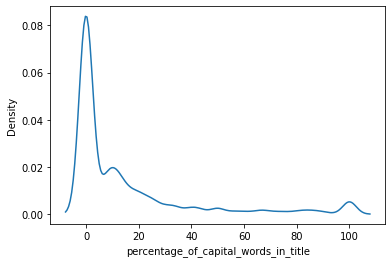

In [42]:
df['percentage_of_capital_words_in_title'] = (df['number_of_capital_words_in_title']/df['number_of_words_in_title'])*100

print(df['percentage_of_capital_words_in_title'].median())
print(df['percentage_of_capital_words_in_title'].mean())
print(df['percentage_of_capital_words_in_title'].max())
print(df['percentage_of_capital_words_in_title'].min())

ax = sns.kdeplot(data=df, x="percentage_of_capital_words_in_title")

 
plt.show()

18.0
18.83567269767733
0
78


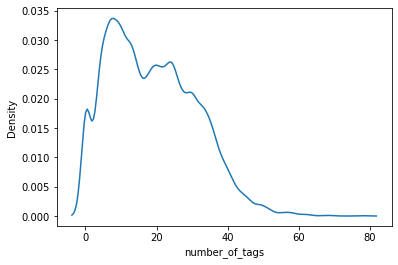

In [43]:
df['number_of_tags'] = df['tags'].apply(len) 

print(df['number_of_tags'].median())
print(df['number_of_tags'].mean())
print(df['number_of_tags'].min())
print(df['number_of_tags'].max())


ax = sns.kdeplot(data=df, x="number_of_tags")
plt.show()

729.0
958.9857759969949
0
5260


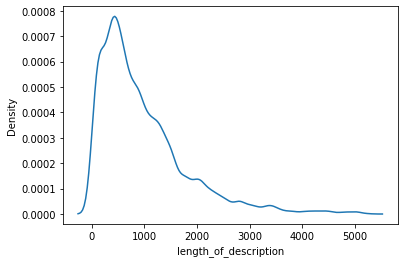

In [44]:
df['length_of_description'] = df['description'].apply(lambda x : len(str(x))) #talk about the split, why str

print(df['length_of_description'].median())
print(df['length_of_description'].mean())
print(df['length_of_description'].min())
print(df['length_of_description'].max())


ax = sns.kdeplot(data=df, x="length_of_description")
plt.show()

***All KDE plots together***

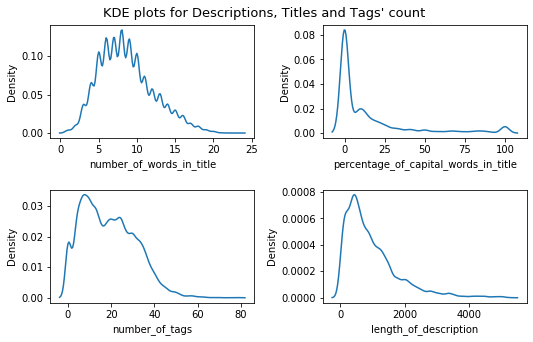

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(8,5))
plt.subplot(2,2,1)
df['number_of_words_in_title'] = df['title'].apply(lambda x : len(x.split()))
sns.kdeplot(data=df, x="number_of_words_in_title")
plt.subplot(2,2,2)
df['percentage_of_capital_words_in_title'] = (df['number_of_capital_words_in_title']/df['number_of_words_in_title'])*100
sns.kdeplot(data=df, x="percentage_of_capital_words_in_title")
plt.subplot(2,2,3)
df['number_of_tags'] = df['tags'].apply(len)
sns.kdeplot(data=df, x="number_of_tags")
plt.subplot(2,2,4)

df['length_of_description'] = df['description'].apply(lambda x : len(str(x))) 
ax = sns.kdeplot(data=df, x="length_of_description")
fig.suptitle('KDE plots for Descriptions, Titles and Tags\' count', fontsize=13)
fig.tight_layout(pad=2.5,h_pad=1.8, w_pad=1.3)
plt.savefig('kde')
plt.show()

**Does the Title have a Authenticity Generating Word?**

In [46]:
def is_appealing_word_present(sentence):
    appealing_words = [r'original', r'must.*watch',r'trending', r'latest',r'new', r'best', r'top', r'official']
    sentence = sentence.lower()
    for word in appealing_words:
        if re.search(word, sentence) != None:
            return True
    return False
df['is_authenticity_geerating_word_present_in_title'] = df['title'].apply(is_appealing_word_present)

print('Percentage of videos with authenticity generating word:', 
      (df['is_authenticity_geerating_word_present_in_title']
       [df['is_authenticity_geerating_word_present_in_title'] == True].count()/len(df))*100)

Percentage of videos with authenticity generating word: 19.51418017905215


**Is Title a Question?**

In [47]:
def is_question(sentence):
    q_starters = [r'^\s*who', r'^\s*what', r'^\s*when', r'^\s*where', r'^\s*why', r'^\s*how', r'\?', r'^\s*which', r'^\s*won\'?t', r'^\s*can\'?t', r'^\s*isn\'?t', r'^\s*aren\'?t', r'^\s*is', r'^\s*do', r'^\s*does', r'^\s*will', r'^\s*can', r'^\s*is']
    sentence = sentence.lower()
    for word in q_starters:
        if re.search(word, sentence) != None:
            return True

    prepositions = ['about', 'beside', 'near', 'to', 'above', 'between', 'of', 'towards', 'across', 'beyond', 'off', 'under', 'after', 'by', 'on', 'underneath', 'against', 'despite', 'onto', 'unlike', 'along', 'down', 'opposite', 'until', 'among', 'during', 'out', 'up', 'around', 'except', 'outside', 'upon', 'as', 'for', 'over', 'via', 'at', 'from', 'past', 'with', 'before', 'in', 'round', 'within', 'behind', 'inside', 'since', 'without', 'below', 'into', 'than', 'beneath', 'like', 'through']
   
    words = sentence.split()

    if words[0] in prepositions:
        sentence = sentence[len(words[0]):]
        for word in q_starters:
            if re.search(word, sentence) != None:
                return True

    return False

df['is_title_a_question'] = df['title'].apply(is_question)
df['is_title_a_question'][df['is_title_a_question'] == True].count()/len(df)
print('Percentage of videos with a question in the title:', (df['is_title_a_question']
                                                             [df['is_title_a_question'] == True].
                                                             count()/len(df))*100)

Percentage of videos with a question in the title: 9.155449821573907


**Multibar Plot of the Symbols:**

In [36]:
def get_number_of_pattern(sentence, pattern):
    count = 0
    for match in re.finditer(pattern, sentence):
       count += 1
    return count

In [37]:
punctuation_placeholder = 'Special Characters'

In [30]:
df['number_of_exclamation_marks_in_title'] = df['title'].apply(get_number_of_pattern, args=(r'\!',))

ratio_exclamation_marks = list()
total_records = len(df)
for i in range(1,5):
    ratio_exclamation_marks.append((df['number_of_exclamation_marks_in_title']
                                    [df['number_of_exclamation_marks_in_title'] == i]
                                    .count()/total_records)*100)
ratio_exclamation_marks
punctutation_df = pd.DataFrame(
{
    'Count' : [i for i in range(1,5)],
    punctuation_placeholder : ['Exclamation Mark !' for i in range(1,5)],
    'Percentage' : ratio_exclamation_marks
})
punctutation_df

,Count,Special Characters,Percentage
0,1,Exclamation Mark !,8.071120
1,2,Exclamation Mark !,1.183247
2,3,Exclamation Mark !,0.438240
3,4,Exclamation Mark !,0.095161


In [31]:
punctuations = {
    'pipes' : ('Pipe |', r'\|'),
}

for punctutation in punctuations:

    df[f'number_of_{punctutation}_in_title'] = df['title'].apply(get_number_of_pattern, args=(punctuations[punctutation][1],))

    ratio_punctutation_marks = list()
    total_records = len(df)
    
    for i in range(1,5):
        ratio_punctutation_marks.append((df[f'number_of_{punctutation}_in_title']
                                         [df[f'number_of_{punctutation}_in_title'] == i]
                                         .count()/total_records)*100)
    
    punctutation_df = punctutation_df.append(pd.DataFrame(
    {
        'Count' : [i for i in range(1,5)],
        punctuation_placeholder : [punctuations[punctutation][0] for i in range(1,5)],
        'Percentage' : ratio_punctutation_marks
    }), ignore_index = True)

punctutation_df

,Count,Special Characters,Percentage
0,1,Exclamation Mark !,8.071120
1,2,Exclamation Mark !,1.183247
2,3,Exclamation Mark !,0.438240
3,4,Exclamation Mark !,0.095161
4,1,Pipe |,14.490703
5,2,Pipe |,4.947098
6,3,Pipe |,0.093908
7,4,Pipe |,0.065110


In [32]:
punctuations = {
    'parenthesis' : ('Pair of Parentheses ()', r'\(|\)'),
    'square_brackets' : ('Pair of Square Brackets []', r'\[|\]'),
    'single_quotes' : ("Pair of Single Quotes ''", r'\'')
}

for punctutation in punctuations:

    df[f'number_of_{punctutation}_in_title'] = df['title'].apply(get_number_of_pattern, 
                                                                 args=(punctuations[punctutation][1],))

    ratio_punctutation_marks = list()
    total_records = len(df)
    
    for i in [2,4,6,8]:
        ratio_punctutation_marks.append((df[f'number_of_{punctutation}_in_title']
                                         [df[f'number_of_{punctutation}_in_title'] == i]
                                         .count()/total_records)*100)
    
    punctutation_df = punctutation_df.append(pd.DataFrame(
    {
        'Count' : [i for i in range(1,5)],
        punctuation_placeholder : [punctuations[punctutation][0] for i in range(1,5)],
        'Percentage' : ratio_punctutation_marks
    }), ignore_index = True)

punctutation_df

,Count,Special Characters,Percentage
0,1,Exclamation Mark !,8.071120
1,2,Exclamation Mark !,1.183247
2,3,Exclamation Mark !,0.438240
3,4,Exclamation Mark !,0.095161
4,1,Pipe |,14.490703
5,2,Pipe |,4.947098
6,3,Pipe |,0.093908
7,4,Pipe |,0.065110
8,1,Pair of Parentheses (),21.212045
9,2,Pair of Parentheses (),1.664058


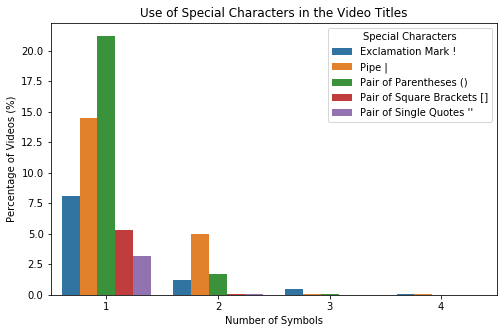

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(data=punctutation_df, y="Percentage", x="Count", hue=punctuation_placeholder)
plt.title('Use of Special Characters in the Video Titles')
plt.ylabel('Percentage of Videos (%)')
plt.xlabel('Number of Symbols')
plt.savefig('special_characters_graph.png', dpi=300)
plt.show()